# EDA of US car prices dataset

## About Dataset
This dataset is a collection of 1000 randomly generated data points for used car prices. The data includes the make, model, year, mileage, price, color, state, and date of each car. The make of each car can be Toyota, Honda, Ford, Chevrolet, or Nissan, while the model can be Camry, Accord, Fusion, Cruze, or Altima. The year of the car ranges from 2010 to 2018, while the mileage ranges from 10,000 to 100,000 miles. The price of the car ranges from $10,000 to $50,000. The color of the car can be red, blue, white, black, or silver. The state where the car is located can be California, New York, Texas, Florida, or Illinois. The date of the data point is also included and is randomly generated between the current date and a year ago. This dataset can be used to analyze trends in the used car market, such as how the price of a car varies based on its make, model, year, and mileage, as well as how it varies based on location and time.

https://www.kaggle.com/datasets/at3191/us-car-prices

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Считывание данных из файла
df = pd.read_csv('car_prices.csv')

In [3]:
# Обзор структуры данных
df.head()

,make,model,year,mileage,price,color,state,date
0,Chevrolet,Cruze,2011,99157,37488,white,TX,2023-09-26 23:02:01.647970
1,Toyota,Cruze,2017,19882,34176,red,IL,2023-08-08 23:02:01.648413
2,Chevrolet,Altima,2011,77718,40297,blue,CA,2023-02-25 23:02:01.648422
3,Nissan,Fusion,2012,83613,43492,silver,TX,2023-04-25 23:02:01.648425
4,Ford,Cruze,2016,95349,26655,red,NY,2023-12-14 23:02:01.648426


In [4]:
# Проверка количества строк
df.shape[0]

10000

In [5]:
# Проверка типов данных
df.dtypes

make       object
model      object
year        int64
mileage     int64
price       int64
color      object
state      object
date       object
dtype: object

In [6]:
# Некорректный тип и формат даты приведем к формату даты без времени
df.date = pd.to_datetime(df.date).dt.date
df.head()

,make,model,year,mileage,price,color,state,date
0,Chevrolet,Cruze,2011,99157,37488,white,TX,2023-09-26
1,Toyota,Cruze,2017,19882,34176,red,IL,2023-08-08
2,Chevrolet,Altima,2011,77718,40297,blue,CA,2023-02-25
3,Nissan,Fusion,2012,83613,43492,silver,TX,2023-04-25
4,Ford,Cruze,2016,95349,26655,red,NY,2023-12-14


In [7]:
# Проверка пропущенных значений
df.isna().sum()

make       0
model      0
year       0
mileage    0
price      0
color      0
state      0
date       0
dtype: int64

In [8]:
# Описательная статистика числовых признаков
df.describe()

,year,mileage,price
count,10000.000000,10000.00000,10000.000000
mean,2013.828000,55798.05900,29376.222000
std,2.627376,25128.85138,11660.361084
min,2010.000000,10284.00000,10022.000000
25%,2011.000000,35137.50000,19071.250000
50%,2014.000000,55739.50000,29418.500000
75%,2016.000000,77193.75000,39133.500000
max,2018.000000,99783.00000,49998.000000


In [9]:
# Корреляция числовых признаков
df.corr()

,year,mileage,price
year,1.000000,0.031308,-0.028390
mileage,0.031308,1.000000,0.035534
price,-0.028390,0.035534,1.000000


[Text(0.5, 1.0, 'Price distribution'), Text(0.5, 0, 'Price, USD')]

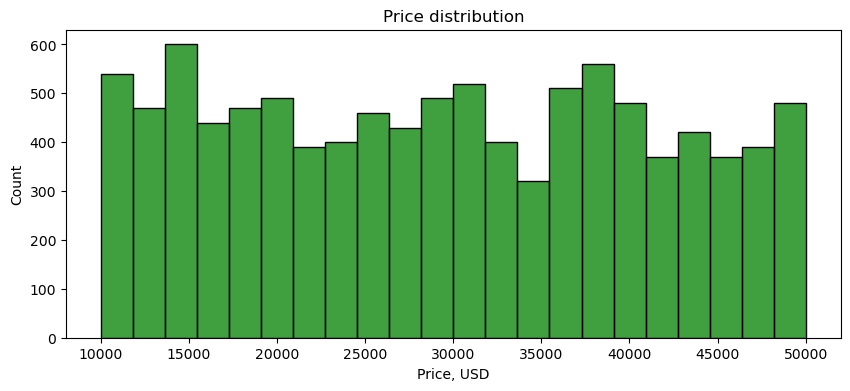

In [10]:
# Гистограмма распределения цен на автомобили
plt.figure(figsize=(10,4))
sns.histplot(data = df, x = 'price', color='g').set(title = 'Price distribution', xlabel = 'Price, USD')

[Text(0.5, 1.0, 'Mileage distribution'), Text(0.5, 0, 'Mileage, Miles')]

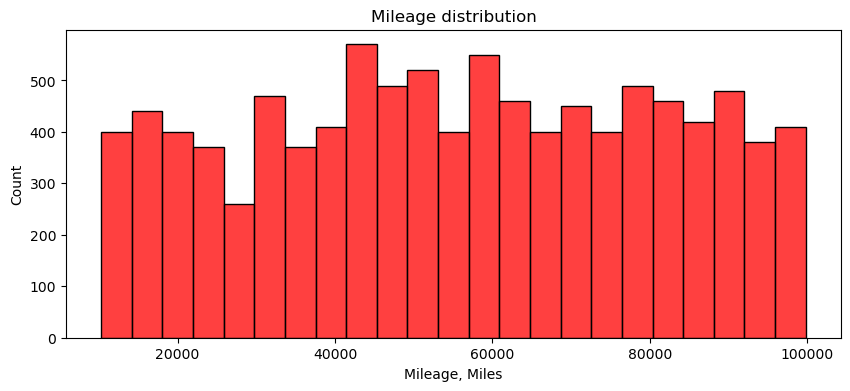

In [11]:
# Гистограмма провега представленных автомобилей
plt.figure(figsize=(10,4))
sns.histplot(data = df, x = 'mileage', color='r').set(title = 'Mileage distribution', xlabel = 'Mileage, Miles')

[Text(0.5, 1.0, 'Year of production distribution'), Text(0.5, 0, 'Year')]

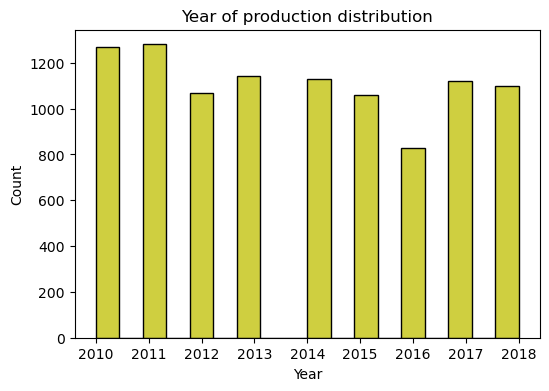

In [12]:
# Гистограмма по году выпуска
plt.figure(figsize=(6,4))
sns.histplot(data = df, x = 'year', color='y').set(title = 'Year of production distribution', xlabel = 'Year')

[Text(0.5, 1.0, 'Price and year depencies')]

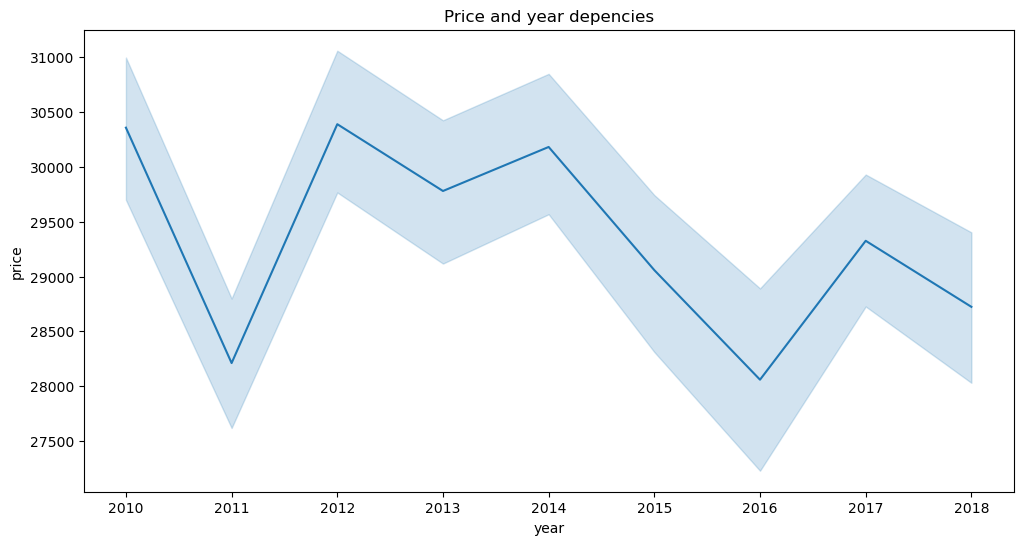

In [13]:
# Обобщенный тренд зависимости цены от года выпуска
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='year', y='price')\
   .set(title = 'Price and year depencies')

[Text(0.5, 1.0, 'Price and color depencies')]

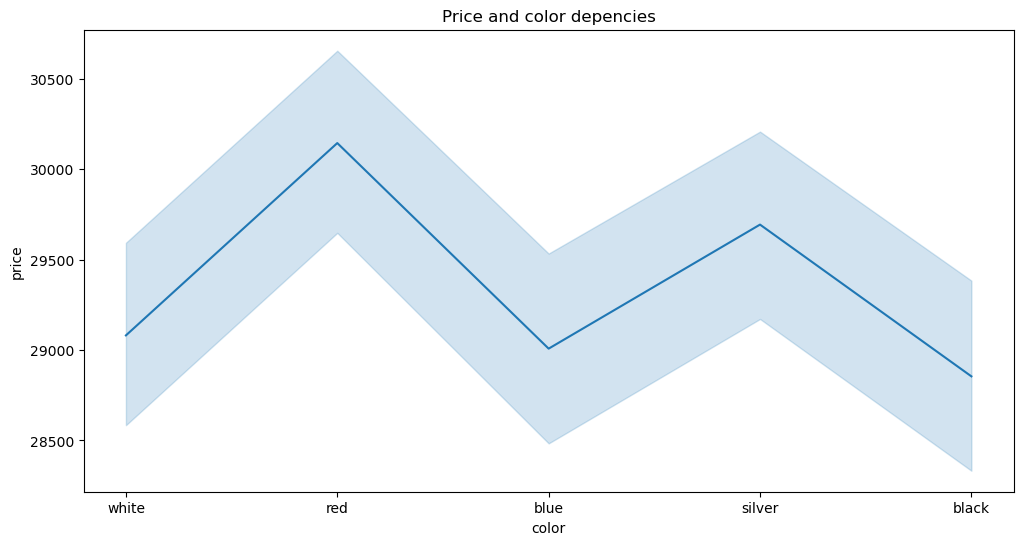

In [14]:
# Обобщенный тренд зависимости цены от цвета кузова
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='color', y='price')\
   .set(title = 'Price and color depencies')

[Text(0.5, 1.0, 'Prices and mileage by make')]

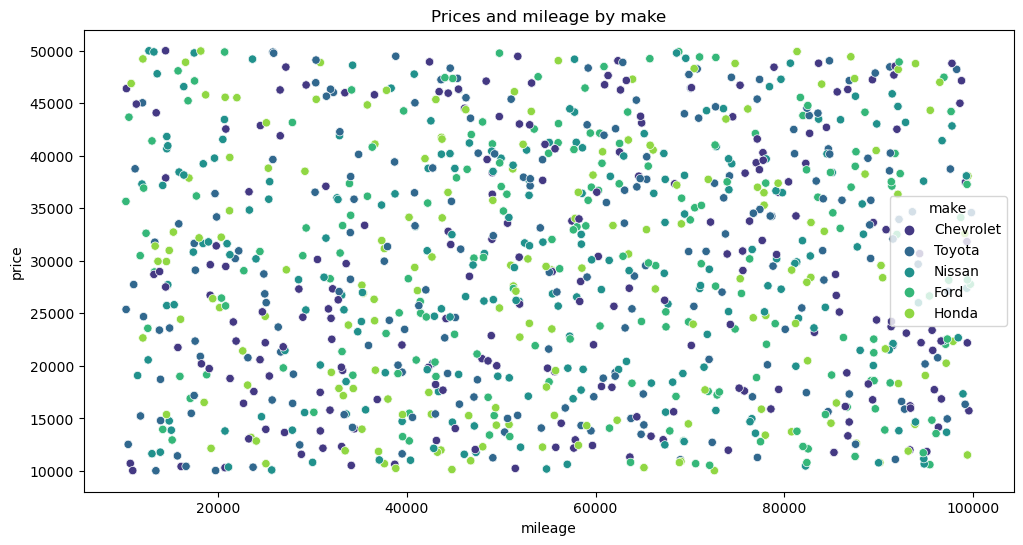

In [15]:
# Точечная визуализация зависимостей цен от пробега по группам производителей
plt.figure(figsize=(12,6))
sns.scatterplot(data=df,
                x='mileage', 
                y='price', 
                hue = 'make', 
                palette='viridis')\
    .set(title = 'Prices and mileage by make')

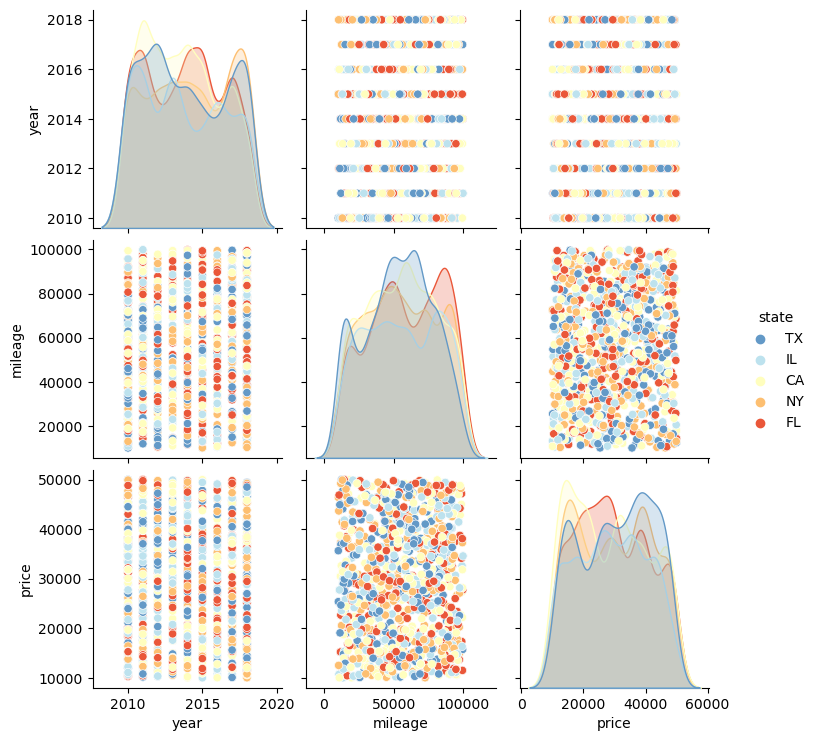

In [16]:
# Визуализация особенностей географического признака
sns.pairplot(df, hue = 'state', palette = 'RdYlBu_r')